# Let's see ...

In [8]:
import quandl as Quandl
Quandl.ApiConfig.api_key = "HUNTmXM2vsCAHPr45CV4"
import numpy as np
import pandas as pd
import math
from sklearn import preprocessing, svm
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from matplotlib import style
import datetime

%matplotlib inline

In [64]:
# Gathers industrial stocks
frameTest1 = Quandl.get("WIKI/GE")  # General Electric
frameTest2 = Quandl.get("WIKI/MMM") # Alcoa
frameTest3 = Quandl.get("WIKI/BA")  # Boeing

In [46]:
# Gathers tech stocks
frameTest4 = Quandl.get("WIKI/ORCL") # Oracle
frameTest5 = Quandl.get("WIKI/EA")   # Electronic Arts
frameTest6 = Quandl.get("WIKI/PYPL") # Paypal

In [128]:
# Stacks adjusted close data in last 'sample_size' days for each stock
sample_size = 600
closes = np.empty((sample_size, 6))
for i in range(6):
    closes[:, i] = eval("frameTest" + str(i + 1) + "['Adj. Close'][-sample_size:]")

In [129]:
# Forms covariance matrix from array of close data
covar_mat = np.empty((6, 6))
for i in range(closes.shape[1]):
    for j in range(closes.shape[1]):
        covar_mat[i][j] = np.dot(closes[:,i], closes[:,j]) / (np.linalg.norm(closes[:,i]) * np.linalg.norm(closes[:,j]))

In [130]:
print(covar_mat)

[[1.         0.95184118 0.86062385 0.96109587 0.93158726 0.89235377]
 [0.95184118 1.         0.97271455 0.99742972 0.99453805 0.98554044]
 [0.86062385 0.97271455 1.         0.9652721  0.98088738 0.99497704]
 [0.96109587 0.99742972 0.9652721  1.         0.99340409 0.98084395]
 [0.93158726 0.99453805 0.98088738 0.99340409 1.         0.98974243]
 [0.89235377 0.98554044 0.99497704 0.98084395 0.98974243 1.        ]]


In [137]:
u, s, vT = np.linalg.svd(closes)

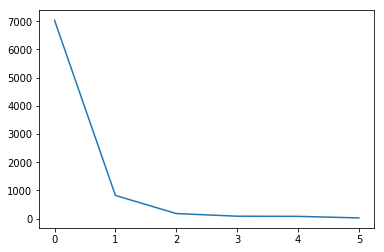

In [138]:
plt.plot(s)